In [29]:
import numpy as np
import sys
#np.set_printoptions(precision=5, linewidth=200, suppress=True)
import psi4
from helper_PFCI import PFHamiltonianGenerator
from helper_PFCI import Determinant
from helper_cqed_rhf import cqed_rhf
np.set_printoptions(threshold=sys.maxsize)
psi4.core.set_output_file('output.dat', False)

For both lambda = 0.01 and 0.08 do:
- Do Minimal basis pCQED (Nel = 2, Np = 2)
- Do large basis pCQED (Nel = 50, Np = 10)
- Do minimal basis QED-FCI (Np = 1)
- Do large basis QED-FCI (Np = 6)

In [30]:
# options for mgf
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
    "save_jk" : True
}


psi4.set_options(options_dict)
mol = psi4.geometry(mol_str)


In [60]:
mol_str = """
Li
H 1 1.5
symmetry c1
"""

options_dict = {
    "basis": "sto-3g",
    "scf_type": "pk",
    "e_convergence": 1e-10,
    "d_convergence": 1e-10,
}

pcqed_dict = {
    'omega_value' : 0.0,
    'lambda_vector' : np.array([0, 0, 0]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 0
}

scqed_dict = {
    'omega_value' : 0.12086,
    'lambda_vector' : np.array([0, 0, 0.08]),
    'ci_level' : 'fci',
    'full_diagonalization' : True,
    'number_of_photons' : 6
}


mol = psi4.geometry(mol_str)
psi4.set_options(options_dict)

pcqed_res = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    pcqed_dict
)

scqed_res = PFHamiltonianGenerator(
    mol_str,
    options_dict,
    scqed_dict
)



Start SCF iterations:

Canonical RHF One-electron energy = -12.5626302721254959
CQED-RHF One-electron energy      = -12.5626302721254959
Nuclear repulsion energy          = 1.0583544213400000
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8633576215383263   dE = -7.86336E+00   dRMS = 3.54673E-13
SCF Iteration   2: Energy = -7.8633576215383370   dE = -1.06581E-14   dRMS = 7.99578E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86335762 hartree
Psi4  SCF energy: -7.86335762 hartree
 Completed QED-RHF in 0.12781786918640137 seconds
 Completed 1HSO Build in 4.100799560546875e-05 seconds
 Completed ERI Build in 0.0011348724365234375 seconds 
 Completed 2D build in 7.295608520507812e-05 seconds
 Completed 1G build in 1.9311904907226562e-05 seconds
 Completed the Dipole Matrix Build in 4.38690185546875e-05 seconds
 Completed determinant list in 0.00043702125549316406 seconds 
 Completed constant offset matrix in 0.0001220703125 s

In [65]:
mol_tmpl = """
Li
H 1 **R**
symmetry c1
"""

mol_str = """
Li
H 1 1.5
symmetry c1
"""

N_R = 50
N_el = 50
r_array = np.linspace(1.4, 2.2, N_R)

# for pcqed results
E_array = np.zeros((N_R, N_el))
Mu_array = np.zeros((N_R, N_el, N_el, 3))

# scqed results
sc_E_array = np.zeros((N_R, 10))
psi4.set_options(options_dict)

r_idx = 0
for r in r_array:
    mol_str = mol_tmpl.replace("**R**", str(r))
    print(mol_str)
    mol = psi4.geometry(mol_str)
    scf_e, wfn = psi4.energy('SCF', return_wfn=True)
    fci_energy = psi4.energy('fci',ref_wfn=wfn)
    
    # pcqed results
    pcqed_res = PFHamiltonianGenerator(mol_str, options_dict, pcqed_dict)
    assert np.isclose(fci_energy, pcqed_res.CIeigs[0], 1e-7)
    
    # sort out states with dipole-allowed transition from ground state
    singlet_states = pcqed_res.sort_dipole_allowed_states( N_el)
    
    # store values
    E_array[r_idx, :] = pcqed_res.CIeigs[singlet_states]
    Mu_array[r_idx, :, :, :] = pcqed_res.compute_dipole_moments(singlet_states)
    
    # scqed results
    cqed_res = PFHamiltonianGenerator(mol_str, options_dict, scqed_dict)
    sc_E_array[r_idx, :] = cqed_res.CIeigs[:10]

    
    r_idx += 1




Li
H 1 1.4
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.6946346236295895
CQED-RHF One-electron energy      = -12.6946346236295895
Nuclear repulsion energy          = 1.1339511657214287
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8605386610570385   dE = -7.86054E+00   dRMS = 1.78770E-13
SCF Iteration   2: Energy = -7.8605386610570473   dE = -8.88178E-15   dRMS = 3.97284E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86053866 hartree
Psi4  SCF energy: -7.86053866 hartree
 Completed QED-RHF in 0.08870816230773926 seconds
 Completed 1HSO Build in 3.886222839355469e-05 seconds
 Completed ERI Build in 0.0011839866638183594 seconds 
 Completed 2D build in 7.700920104980469e-05 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 4.1961669921875e-05 seconds
 Completed determinant list in 0.0004820823669433594 seconds 
 Completed constant offset matr

 Completed Hamiltonian build in 0.35608696937561035 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.6504263033321447
CQED-RHF One-electron energy      = -12.6147161365767015
Nuclear repulsion energy          = 1.1081061249072652
Dipole energy                     = 0.0337146074531817
SCF Iteration   1: Energy = -7.8519519708686500   dE = -7.85195E+00   dRMS = 8.17956E-04
SCF Iteration   2: Energy = -7.8519862391885136   dE = -3.42683E-05   dRMS = 1.16519E-04
SCF Iteration   3: Energy = -7.8519875319406660   dE = -1.29275E-06   dRMS = 3.77241E-05
SCF Iteration   4: Energy = -7.8519877093222670   dE = -1.77382E-07   dRMS = 1.61799E-05
SCF Iteration   5: Energy = -7.8519877413596708   dE = -3.20374E-08   dRMS = 6.99563E-06
SCF Iteration   6: Energy = -7.8519877472738981   dE = -5.91423E-09   dRMS = 3.01345E-06
SCF Iteration   7: Energy = -7.8519877483673968   dE = -1.09350E-09   dRMS = 1.29643E-06
SCF Iteration   8: Energy = -7.8519877485696030   dE = -2.02206E-10  

 Completed Hamiltonian build in 0.3648538589477539 seconds

Li
H 1 1.4816326530612245
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.5861360519629528
CQED-RHF One-electron energy      = -12.5861360519629528
Nuclear repulsion energy          = 1.0714745174723141
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8632003948502227   dE = -7.86320E+00   dRMS = 3.07280E-13
SCF Iteration   2: Energy = -7.8632003948502245   dE = -1.77636E-15   dRMS = 6.90762E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86320039 hartree
Psi4  SCF energy: -7.86320039 hartree
 Completed QED-RHF in 0.0885617733001709 seconds
 Completed 1HSO Build in 4.124641418457031e-05 seconds
 Completed ERI Build in 0.0011508464813232422 seconds 
 Completed 2D build in 8.20159912109375e-05 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 4.00543212890625e-05 seconds
 Completed determina

 Completed Hamiltonian build in 0.3529019355773926 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.5445686059621977
CQED-RHF One-electron energy      = -12.5067814660222059
Nuclear repulsion energy          = 1.0483699456669811
Dipole energy                     = 0.0354412189136121
SCF Iteration   1: Energy = -7.8528532488296134   dE = -7.85285E+00   dRMS = 8.25944E-04
SCF Iteration   2: Energy = -7.8528947795732256   dE = -4.15307E-05   dRMS = 1.49737E-04
SCF Iteration   3: Energy = -7.8528973457547186   dE = -2.56618E-06   dRMS = 5.66227E-05
SCF Iteration   4: Energy = -7.8528977492703769   dE = -4.03516E-07   dRMS = 2.42300E-05
SCF Iteration   5: Energy = -7.8528978214212399   dE = -7.21509E-08   dRMS = 1.03451E-05
SCF Iteration   6: Energy = -7.8528978344476128   dE = -1.30264E-08   dRMS = 4.40330E-06
SCF Iteration   7: Energy = -7.8528978368013425   dE = -2.35373E-09   dRMS = 1.87248E-06
SCF Iteration   8: Energy = -7.8528978372266893   dE = -4.25347E-10   

 Completed Hamiltonian build in 0.36562132835388184 seconds

Li
H 1 1.5632653061224488
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.4840645825417127
CQED-RHF One-electron energy      = -12.4840645825417127
Nuclear repulsion energy          = 1.0155228455416452
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8628390084244559   dE = -7.86284E+00   dRMS = 3.02650E-13
SCF Iteration   2: Energy = -7.8628390084244559   dE =  0.00000E+00   dRMS = 6.77359E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86283901 hartree
Psi4  SCF energy: -7.86283901 hartree
 Completed QED-RHF in 0.0864408016204834 seconds
 Completed 1HSO Build in 4.1961669921875e-05 seconds
 Completed ERI Build in 0.0011670589447021484 seconds 
 Completed 2D build in 7.390975952148438e-05 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 3.981590270996094e-05 seconds
 Completed determin

 Completed Hamiltonian build in 0.3575291633605957 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.4449088519790934
CQED-RHF One-electron energy      = -12.4049025971777986
Nuclear repulsion energy          = 0.9947448845075447
Dipole energy                     = 0.0372495720885881
SCF Iteration   1: Energy = -7.8509380893602936   dE = -7.85094E+00   dRMS = 8.55360E-04
SCF Iteration   2: Energy = -7.8509911494184097   dE = -5.30601E-05   dRMS = 1.89229E-04
SCF Iteration   3: Energy = -7.8509955863687386   dE = -4.43695E-06   dRMS = 7.57453E-05
SCF Iteration   4: Energy = -7.8509963128621214   dE = -7.26493E-07   dRMS = 3.21342E-05
SCF Iteration   5: Energy = -7.8509964407322306   dE = -1.27870E-07   dRMS = 1.35704E-05
SCF Iteration   6: Energy = -7.8509964633628835   dE = -2.26307E-08   dRMS = 5.71656E-06
SCF Iteration   7: Energy = -7.8509964673704298   dE = -4.00755E-09   dRMS = 2.40640E-06
SCF Iteration   8: Energy = -7.8509964680802087   dE = -7.09779E-10   

 Completed Hamiltonian build in 0.36583495140075684 seconds

Li
H 1 1.6448979591836734
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.3878629883869475
CQED-RHF One-electron energy      = -12.3878629883869475
Nuclear repulsion energy          = 0.9651246894353599
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8600906155111119   dE = -7.86009E+00   dRMS = 2.63200E-15
SCF Iteration   2: Energy = -7.8600906155111154   dE = -3.55271E-15   dRMS = 6.61320E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.86009062 hartree
Psi4  SCF energy: -7.86009062 hartree
 Completed QED-RHF in 0.09029197692871094 seconds
 Completed 1HSO Build in 4.100799560546875e-05 seconds
 Completed ERI Build in 0.0011980533599853516 seconds 
 Completed 2D build in 7.295608520507812e-05 seconds
 Completed 1G build in 1.4066696166992188e-05 seconds
 Completed the Dipole Matrix Build in 4.00543212890625e-05 seconds
 Completed determ

 Completed Hamiltonian build in 0.358593225479126 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.3509124121235789
CQED-RHF One-electron energy      = -12.3085393774026652
Nuclear repulsion energy          = 0.9463388074025544
Dipole energy                     = 0.0391422041338158
SCF Iteration   1: Energy = -7.8467825696824232   dE = -7.84678E+00   dRMS = 9.06169E-04
SCF Iteration   2: Energy = -7.8468521487125500   dE = -6.95790E-05   dRMS = 2.32839E-04
SCF Iteration   3: Energy = -7.8468591356061275   dE = -6.98689E-06   dRMS = 9.52207E-05
SCF Iteration   4: Energy = -7.8468602918379009   dE = -1.15623E-06   dRMS = 4.00193E-05
SCF Iteration   5: Energy = -7.8468604920872789   dE = -2.00249E-07   dRMS = 1.67362E-05
SCF Iteration   6: Energy = -7.8468605268953802   dE = -3.48081E-08   dRMS = 6.98511E-06
SCF Iteration   7: Energy = -7.8468605329490142   dE = -6.05363E-09   dRMS = 2.91379E-06
SCF Iteration   8: Energy = -7.8468605340019923   dE = -1.05298E-09   d

 Completed Hamiltonian build in 0.3665308952331543 seconds

Li
H 1 1.726530612244898
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2970344769079389
CQED-RHF One-electron energy      = -12.2970344769079389
Nuclear repulsion energy          = 0.9194923164124112
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8554601055051787   dE = -7.85546E+00   dRMS = 3.91493E-15
SCF Iteration   2: Energy = -7.8554601055051734   dE =  5.32907E-15   dRMS = 9.63271E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.85546011 hartree
Psi4  SCF energy: -7.85546011 hartree
 Completed QED-RHF in 0.1015009880065918 seconds
 Completed 1HSO Build in 4.673004150390625e-05 seconds
 Completed ERI Build in 0.0012421607971191406 seconds 
 Completed 2D build in 8.869171142578125e-05 seconds
 Completed 1G build in 1.621246337890625e-05 seconds
 Completed the Dipole Matrix Build in 4.291534423828125e-05 seconds
 Completed determina

 Completed Hamiltonian build in 0.35784912109375 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.2621088047830202
CQED-RHF One-electron energy      = -12.2172167885177494
Nuclear repulsion energy          = 0.9024251736483759
Dipole energy                     = 0.0411190866603982
SCF Iteration   1: Energy = -7.8408438515888141   dE = -7.84084E+00   dRMS = 9.77359E-04
SCF Iteration   2: Energy = -7.8409358419371040   dE = -9.19903E-05   dRMS = 2.79750E-04
SCF Iteration   3: Energy = -7.8409461605354567   dE = -1.03186E-05   dRMS = 1.15178E-04
SCF Iteration   4: Energy = -7.8409478662395662   dE = -1.70570E-06   dRMS = 4.79626E-05
SCF Iteration   5: Energy = -7.8409481570558635   dE = -2.90816E-07   dRMS = 1.98795E-05
SCF Iteration   6: Energy = -7.8409482067740752   dE = -4.97182E-08   dRMS = 8.22669E-06
SCF Iteration   7: Energy = -7.8409482152784227   dE = -8.50435E-09   dRMS = 3.40316E-06
SCF Iteration   8: Energy = -7.8409482167333620   dE = -1.45494E-09   dR

 Completed Hamiltonian build in 0.3700439929962158 seconds

Li
H 1 1.8081632653061224
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.2111478090659364
CQED-RHF One-electron energy      = -12.2111478090659364
Nuclear repulsion energy          = 0.8779802479513544
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8493510327508229   dE = -7.84935E+00   dRMS = 5.23469E-15
SCF Iteration   2: Energy = -7.8493510327508247   dE = -1.77636E-15   dRMS = 1.36755E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.84935103 hartree
Psi4  SCF energy: -7.84935103 hartree
 Completed QED-RHF in 0.09067797660827637 seconds
 Completed 1HSO Build in 4.076957702636719e-05 seconds
 Completed ERI Build in 0.00116729736328125 seconds 
 Completed 2D build in 7.390975952148438e-05 seconds
 Completed 1G build in 1.3828277587890625e-05 seconds
 Completed the Dipole Matrix Build in 4.00543212890625e-05 seconds
 Completed determina

 Completed Hamiltonian build in 0.35891270637512207 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.1780920696455510
CQED-RHF One-electron energy      = -12.1305255471117057
Nuclear repulsion energy          = 0.8624063189411308
Dipole energy                     = 0.0431777130655451
SCF Iteration   1: Energy = -7.8334868144127068   dE = -7.83349E+00   dRMS = 1.06734E-03
SCF Iteration   2: Energy = -7.8336081838008855   dE = -1.21369E-04   dRMS = 3.29661E-04
SCF Iteration   3: Energy = -7.8336227342055018   dE = -1.45504E-05   dRMS = 1.35704E-04
SCF Iteration   4: Energy = -7.8336251238388588   dE = -2.38963E-06   dRMS = 5.60054E-05
SCF Iteration   5: Energy = -7.8336255251147175   dE = -4.01276E-07   dRMS = 2.30186E-05
SCF Iteration   6: Energy = -7.8336255926512095   dE = -6.75365E-08   dRMS = 9.44986E-06
SCF Iteration   7: Energy = -7.8336256040243839   dE = -1.13732E-08   dRMS = 3.87856E-06
SCF Iteration   8: Energy = -7.8336256059400373   dE = -1.91565E-09  

 Completed Hamiltonian build in 0.3662581443786621 seconds

Li
H 1 1.889795918367347
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.1298328042598946
CQED-RHF One-electron energy      = -12.1298328042598946
Nuclear repulsion energy          = 0.8400545352968682
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8420875414285298   dE = -7.84209E+00   dRMS = 5.74979E-15
SCF Iteration   2: Energy = -7.8420875414285334   dE = -3.55271E-15   dRMS = 1.46530E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.84208754 hartree
Psi4  SCF energy: -7.84208754 hartree
 Completed QED-RHF in 0.09273219108581543 seconds
 Completed 1HSO Build in 4.076957702636719e-05 seconds
 Completed ERI Build in 0.0013499259948730469 seconds 
 Completed 2D build in 8.606910705566406e-05 seconds
 Completed 1G build in 2.6226043701171875e-05 seconds
 Completed the Dipole Matrix Build in 3.981590270996094e-05 seconds
 Completed determi

 Completed Hamiltonian build in 0.3581371307373047 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0985141762878570
CQED-RHF One-electron energy      = -12.0481155389669965
Nuclear repulsion energy          = 0.8257860930837581
Dipole energy                     = 0.0453132521765289
SCF Iteration   1: Energy = -7.8250037595464903   dE = -7.82500E+00   dRMS = 1.17440E-03
SCF Iteration   2: Energy = -7.8251627323911617   dE = -1.58973E-04   dRMS = 3.82490E-04
SCF Iteration   3: Energy = -7.8251825470627452   dE = -1.98147E-05   dRMS = 1.56850E-04
SCF Iteration   4: Energy = -7.8251857709193864   dE = -3.22386E-06   dRMS = 6.41661E-05
SCF Iteration   5: Energy = -7.8251863042818517   dE = -5.33362E-07   dRMS = 2.61608E-05
SCF Iteration   6: Energy = -7.8251863927064846   dE = -8.84246E-08   dRMS = 1.06576E-05
SCF Iteration   7: Energy = -7.8251864073755115   dE = -1.46690E-08   dRMS = 4.34141E-06
SCF Iteration   8: Energy = -7.8251864098096071   dE = -2.43410E-09   

 Completed Hamiltonian build in 0.3668558597564697 seconds

Li
H 1 1.9714285714285715
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -12.0527718772287997
CQED-RHF One-electron energy      = -12.0527718772287997
Nuclear repulsion energy          = 0.8052696684108697
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8339309662690519   dE = -7.83393E+00   dRMS = 4.50116E-15
SCF Iteration   2: Energy = -7.8339309662690519   dE =  0.00000E+00   dRMS = 1.10337E-15
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.83393097 hartree
Psi4  SCF energy: -7.83393097 hartree
 Completed QED-RHF in 0.09260702133178711 seconds
 Completed 1HSO Build in 4.100799560546875e-05 seconds
 Completed ERI Build in 0.0011608600616455078 seconds 
 Completed 2D build in 7.414817810058594e-05 seconds
 Completed 1G build in 1.5020370483398438e-05 seconds
 Completed the Dipole Matrix Build in 3.981590270996094e-05 seconds
 Completed determ

 Completed Hamiltonian build in 0.367110013961792 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -12.0230759592923349
CQED-RHF One-electron energy      = -11.9696866769751988
Nuclear repulsion energy          = 0.7921491850151733
Dipole energy                     = 0.0475186595357302
SCF Iteration   1: Energy = -7.8156293911397210   dE = -7.81563E+00   dRMS = 1.29707E-03
SCF Iteration   2: Energy = -7.8158356587820865   dE = -2.06268E-04   dRMS = 4.38292E-04
SCF Iteration   3: Energy = -7.8158619182886309   dE = -2.62595E-05   dRMS = 1.78653E-04
SCF Iteration   4: Energy = -7.8158661435386598   dE = -4.22525E-06   dRMS = 7.24510E-05
SCF Iteration   5: Energy = -7.8158668323362370   dE = -6.88798E-07   dRMS = 2.93067E-05
SCF Iteration   6: Energy = -7.8158669448570404   dE = -1.12521E-07   dRMS = 1.18500E-05
SCF Iteration   7: Energy = -7.8158669632515654   dE = -1.83945E-08   dRMS = 4.79167E-06
SCF Iteration   8: Energy = -7.8158669662595006   dE = -3.00794E-09   d

 Completed Hamiltonian build in 0.3772449493408203 seconds

Li
H 1 2.053061224489796
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9796907659129843
CQED-RHF One-electron energy      = -11.9796907659129843
Nuclear repulsion energy          = 0.7732509937225647
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8250927429137160   dE = -7.82509E+00   dRMS = 3.20782E-15
SCF Iteration   2: Energy = -7.8250927429137231   dE = -7.10543E-15   dRMS = 9.34040E-16
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.82509274 hartree
Psi4  SCF energy: -7.82509274 hartree
 Completed QED-RHF in 0.09232378005981445 seconds
 Completed 1HSO Build in 4.220008850097656e-05 seconds
 Completed ERI Build in 0.00121307373046875 seconds 
 Completed 2D build in 7.700920104980469e-05 seconds
 Completed 1G build in 1.4781951904296875e-05 seconds
 Completed the Dipole Matrix Build in 3.910064697265625e-05 seconds
 Completed determina

 Completed Hamiltonian build in 0.35663580894470215 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.9515180443788989
CQED-RHF One-electron energy      = -11.8949797019369168
Nuclear repulsion energy          = 0.7611453030184931
Dipole energy                     = 0.0497847177115595
SCF Iteration   1: Energy = -7.8055524738989792   dE = -7.80555E+00   dRMS = 1.43431E-03
SCF Iteration   2: Energy = -7.8058174538521623   dE = -2.64980E-04   dRMS = 4.97246E-04
SCF Iteration   3: Energy = -7.8058515073555199   dE = -3.40535E-05   dRMS = 2.01142E-04
SCF Iteration   4: Energy = -7.8058569193734169   dE = -5.41202E-06   dRMS = 8.08617E-05
SCF Iteration   5: Energy = -7.8058577886797202   dE = -8.69306E-07   dRMS = 3.24548E-05
SCF Iteration   6: Energy = -7.8058579286197904   dE = -1.39940E-07   dRMS = 1.30257E-05
SCF Iteration   7: Energy = -7.8058579511657129   dE = -2.25459E-08   dRMS = 5.22865E-06
SCF Iteration   8: Energy = -7.8058579547992952   dE = -3.63358E-09  

 Completed Hamiltonian build in 0.3669421672821045 seconds

Li
H 1 2.1346938775510207
symmetry c1


Start SCF iterations:

Canonical RHF One-electron energy = -11.9103500847605819
CQED-RHF One-electron energy      = -11.9103500847605819
Nuclear repulsion energy          = 0.7436811660467495
Dipole energy                     = 0.0000000000000000
SCF Iteration   1: Energy = -7.8157446684501286   dE = -7.81574E+00   dRMS = 3.25028E-13
SCF Iteration   2: Energy = -7.8157446684500949   dE =  3.37508E-14   dRMS = 8.72837E-14
Total time for SCF iterations: 0.000 seconds 

QED-RHF   energy: -7.81574467 hartree
Psi4  SCF energy: -7.81574467 hartree
 Completed QED-RHF in 0.08922791481018066 seconds
 Completed 1HSO Build in 4.601478576660156e-05 seconds
 Completed ERI Build in 0.0011920928955078125 seconds 
 Completed 2D build in 0.0001220703125 seconds
 Completed 1G build in 1.5735626220703125e-05 seconds
 Completed the Dipole Matrix Build in 4.7206878662109375e-05 seconds
 Completed determinant

 Completed Hamiltonian build in 0.3563988208770752 seconds

Start SCF iterations:

Canonical RHF One-electron energy = -11.8836129583984125
CQED-RHF One-electron energy      = -11.8237681460240154
Nuclear repulsion energy          = 0.7324769300234460
Dipole energy                     = 0.0521000375146247
SCF Iteration   1: Energy = -7.7949250936753645   dE = -7.79493E+00   dRMS = 1.58554E-03
SCF Iteration   2: Energy = -7.7952622514966725   dE = -3.37158E-04   dRMS = 5.59647E-04
SCF Iteration   3: Energy = -7.7953056437468033   dE = -4.33923E-05   dRMS = 2.24347E-04
SCF Iteration   4: Energy = -7.7953124477904749   dE = -6.80404E-06   dRMS = 8.93983E-05
SCF Iteration   5: Energy = -7.7953135244278018   dE = -1.07664E-06   dRMS = 3.56021E-05
SCF Iteration   6: Energy = -7.7953136952022595   dE = -1.70774E-07   dRMS = 1.41826E-05
SCF Iteration   7: Energy = -7.7953137223153091   dE = -2.71130E-08   dRMS = 5.65129E-06
SCF Iteration   8: Energy = -7.7953137266214805   dE = -4.30617E-09   

 Completed Hamiltonian build in 0.36762118339538574 seconds


In [66]:
from matplotlib import pyplot as plt

safe_1 = np.copy(sc_E_array[:,1])
safe_2 = np.copy(sc_E_array[:,2])

#sc_E_array[:,1] = np.copy(safe_1)
#sc_E_array[:,2] = np.copy(safe_2)


In [68]:
nop = np.copy(sc_E_array[:20,1])
lup = np.copy(sc_E_array[:20,2])
#E_array[10,2] = nop1
#E_array[10,1] = lup1

sc_E_array[:20,2] = np.copy(nop)
sc_E_array[:20,1] = np.copy(lup)

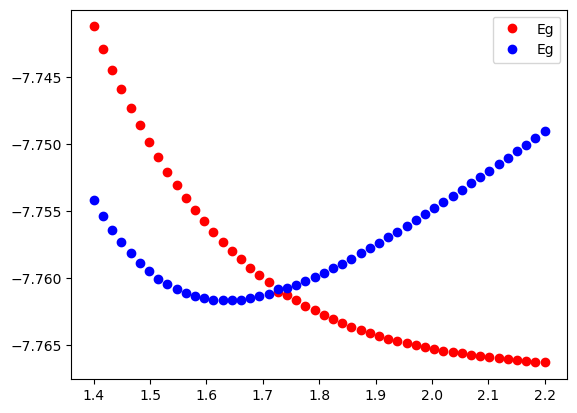

In [69]:
#print(r_array)
#print(E_array[:,1]-E_array[:,0])

#plt.plot(r_array, E_array[:,0]+0.1208, label="E0")
#plt.plot(r_array, E_array[:,1], label="E1")
#plt.plot(r_array, E_array[:,2], label="E2")

plt.plot(r_array, sc_E_array[:,1], 'ro', label="Eg")
plt.plot(r_array, sc_E_array[:,2], 'bo', label="Eg")
#plt.plot(r_array, E_array[:,3], label="E3")
plt.legend()
#plt.xlim(1.79, 1.81)
plt.show()

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [46]:
def build_pf_hamiltonian(n_el, n_ph, E_R, omega, lamvec, mu):
    """
    Given an array of n_el E_R values and an n_ph states with fundamental energy omega
    build the PF Hamiltonian
    
    n_el : int
        the number of electronic states (n_el = 1 means only ground-state)
    
    n_ph : int
        the number of photon occupation states (n_ph = 1 means only the |0> state)
    
    E_R : np.array of floats
        the electronic energies
        
    omega : float
        the energy of the photonic mode
        
    lamvec : np.array of floats
        the lambda vector
        
    mu : (n_el x n_el x 3) np.array of floats 
        mu[i, j, k] is the kth cartesian component of the dipole moment expectation value between 
        state i and state j
    
    """
    H_PF = np.zeros((n_el * n_ph, n_el * n_ph))
    
    # take care of the diagonals first
    # bare electronic and photonic energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            H_PF[na,na] = E_R[a] + n * omega
        
    # diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for g in range(n_el):
                H_PF[na,na] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g,a,:])
            
    # off-diagonal dipole self energy
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            for b in range(n_el):
                nb = n * n_el + b
                for g in range(n_el):
                    if a != b:
                        H_PF[na, nb] += 0.5 * np.dot(lamvec, mu[a,g,:]) * np.dot(lamvec, mu[g, b, :])
                
    # off-diagonal bilinear coupling
    for n in range(n_ph):
        for a in range(n_el):
            na = n * n_el + a
            
            for m in range(n_ph):
                for b in range(n_el):
                    mb = m * n_el + b
                    
                    if n == (m-1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na,mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m) 
                        
                    elif n == (m+1) and a != b:
                        #print(n, a, na, m, b, mb)
                        H_PF[na, mb] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1) 
                        H_PF[mb, na] = -np.sqrt(omega / 2) * np.dot(lamvec, mu[a,b,:]) * np.sqrt(m+1)
                        
    
    return H_PF


def MAE(E, Ep):
    """
    function to return the mean absolute error of the approximate PES stored in Ep relative to 
    the exact PES stored in E
    """
    # get length
    _NR = len(E)
    
    # take element-by-element difference
    _diff = E - Ep
    
    # compute absolute value of differences
    _absdiff = np.abs(_diff)
    
    # return sum divided by _NR
    return np.sum(_absdiff) / _NR
                
            

        
    
    

\begin{equation}
\hat{H}_{\alpha n, \beta m} = \left( E_{\alpha}(R) + n \omega \right) \delta_{\alpha \beta} \delta_{nm} + \sqrt{\frac{\omega}{2}} \lambda \cdot \mu_{\alpha \beta}(R) \left(\sqrt{n} \delta_{n,m-1} + \sqrt{n+1} \delta_{n,m+1} \right)  \\
+\frac{1}{2} \sum_{\gamma = 1}^N \lambda \cdot \mu_{\alpha, \gamma}(R) \lambda \cdot \mu_{\gamma, \beta} \delta_{nm}
\end{equation}


In [47]:
np.set_printoptions(precision=6, linewidth=200, suppress=True)
omega_cav = 0.12086
lambda_vector = np.array([0., 0., 0.08])
N_el = 3
N_ph = 2

_HPF = build_pf_hamiltonian(N_el, N_ph, E_array[0,:], omega_cav, lambda_vector, Mu_array[0, :, :, :])
print("H")
print(_HPF)

H
[[-7.866597 -0.000225  0.        0.       -0.011859  0.      ]
 [-0.000225 -7.725701 -0.       -0.011859  0.        0.      ]
 [ 0.       -0.       -7.682382  0.        0.        0.      ]
 [ 0.       -0.011859  0.       -7.745737 -0.000225  0.      ]
 [-0.011859  0.        0.       -0.000225 -7.604841 -0.      ]
 [ 0.        0.        0.        0.       -0.       -7.561522]]


In [81]:
N_el = 50
N_ph = 6
pcqed_nel50_np6 = np.zeros((N_R, N_el * N_ph ))
for k in range(N_R):           
    _HPF = build_pf_hamiltonian(N_el, N_ph, E_array[k,:], omega_cav, lambda_vector, Mu_array[k, :, :, :])
    pf_e, pf_c = np.linalg.eigh(_HPF)
    pcqed_nel50_np6[k,:] = pf_e



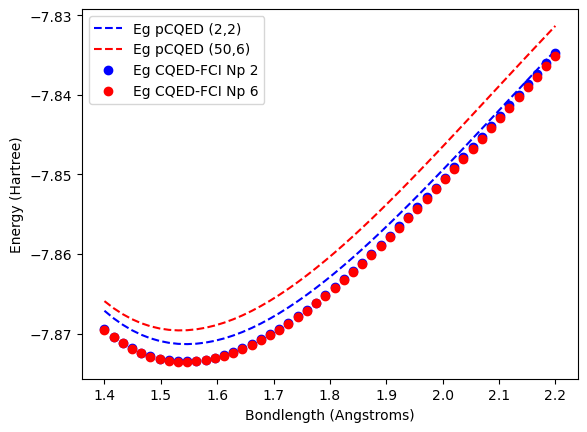

In [82]:
#plt.plot(r_array, Eg_QED_FCI_Np_1)
sc_E_arrat_Np_6 = np.copy(sc_E_array)
plt.plot(r_array, pcqed_nel2_np2[:,0], 'b--', label="Eg pCQED (2,2)")
#plt.plot(r_array, pcqed_nel2_np2[:,0], label="pCQED (50,6)")
plt.plot(r_array, pcqed_nel50_np6[:,0], 'r--', label="Eg pCQED (50,6)")
plt.plot(r_array, sc_E_arrat_Np_1[:,0], 'bo', label="Eg CQED-FCI Np 2")
plt.plot(r_array, sc_E_arrat_Np_6[:,0], 'ro', label="Eg CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

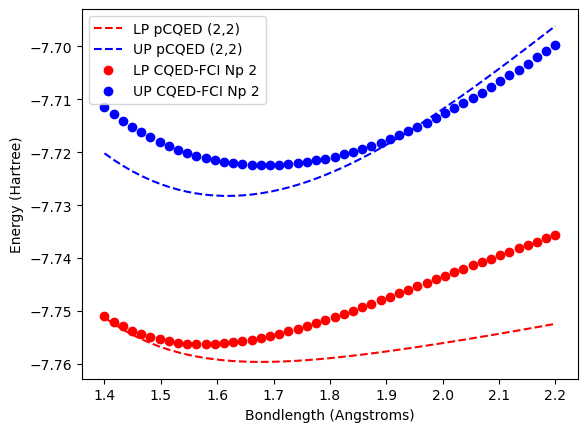

In [83]:

plt.plot(r_array, pcqed_nel2_np2[:,1], 'r--', label="LP pCQED (2,2)")
plt.plot(r_array, pcqed_nel2_np2[:,2], 'b--', label="UP pCQED (2,2)")
plt.plot(r_array, sc_E_arrat_Np_1[:,2], 'ro', label="LP CQED-FCI Np 2")
plt.plot(r_array, sc_E_arrat_Np_1[:,3], 'bo', label="UP CQED-FCI Np 2")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

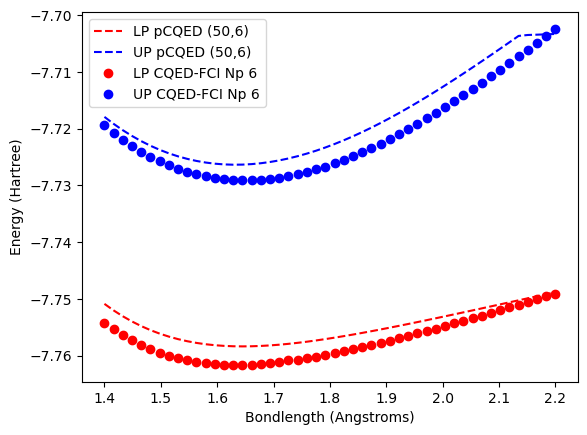

In [84]:
plt.plot(r_array, pcqed_nel50_np6[:,1], 'r--', label="LP pCQED (50,6)")
plt.plot(r_array, pcqed_nel50_np6[:,2], 'b--', label="UP pCQED (50,6)")
plt.plot(r_array, sc_E_arrat_Np_6[:,2], 'ro', label="LP CQED-FCI Np 6")
plt.plot(r_array, sc_E_arrat_Np_6[:,3], 'bo', label="UP CQED-FCI Np 6")
plt.ylabel("Energy (Hartree)")
plt.xlabel("Bondlength (Angstroms)")
plt.legend()
plt.show()

In [58]:
for i in range(N_R):
    print(F'{r_array[i]}, {pf_array[i,0]}, {pf_array[i,1]}, {pf_array[i,2]}, {pf_array[i,3]}, {pf_array[i,3]} ')
      

1.4, -7.865924147626063, -7.7508804267322695, -7.717905747495546, -7.681602123890912, -7.681602123890912 
1.4163265306122448, -7.8668165912420145, -7.752038213327047, -7.719139296135161, -7.683262243063789, -7.683262243063789 
1.4326530612244897, -7.867572391563767, -7.7530729217473935, -7.720260924047705, -7.68482066167049, -7.68482066167049 
1.4489795918367345, -7.868198456682805, -7.753992118673561, -7.721275024320102, -7.686282782049272, -7.686282782049272 
1.4653061224489796, -7.86870136944422, -7.754803061362124, -7.722185695280433, -7.687653712157323, -7.687653712157323 
1.4816326530612245, -7.869087406842382, -7.75551271237435, -7.722996763728171, -7.688938284362809, -7.688938284362809 
1.4979591836734694, -7.869362557990396, -7.756127752009069, -7.723711807570572, -7.690141072798909, -7.690141072798909 
1.5142857142857142, -7.869532540783363, -7.756654588523435, -7.724334178012827, -7.6912664093987555, -7.6912664093987555 
1.530612244897959, -7.8696028173659105, -7.75709936624